In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, RepeatedKFold, KFold
from sklearn.preprocessing import LabelEncoder 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
#Metrics for evaluation
from sklearn.metrics import (classification_report,confusion_matrix, precision_score, recall_score,
                             average_precision_score as auprc, precision_recall_curve, f1_score, accuracy_score)

# Data Collection and Exploration

In [31]:
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap="Blues")
    categoryNames = ['No Flood', "Flood"]
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()
    
    print(f'Classification Report - FLOOD AREA')
    print(classification_report(y_test,pred_test))


In [2]:
#LOading of dataset and 
#viewing the first few rows in it
df = pd.read_csv("FloodPrediction.csv", index_col = 0)
#df = pd.read_csv("extracted_events_NOAA.csv", index_col=0)
df.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [3]:
df["Flood?"].isna().sum()

16051

In [4]:
df["Flood?"].value_counts()

1.0    4132
0.0     361
Name: Flood?, dtype: int64

In [5]:
vals = []
cnt = 1
for x in df["Flood?"].tolist():
    if x != 0 and x != 1:
        if cnt <= 4132:
            vals.append(1)
        elif cnt <=4493:
            vals.append(0)
        cnt += 1
        if cnt >= 4493:
            cnt = 1
    else:
        vals.append(int(x))
df["Class"] = vals

In [6]:
(df.isna().sum()/len(df))*100

Station_Names         0.000000
Year                  0.000000
Month                 0.000000
Max_Temp              0.000000
Min_Temp              0.000000
Rainfall              0.000000
Relative_Humidity     0.000000
Wind_Speed            0.000000
Cloud_Coverage        0.000000
Bright_Sunshine       0.000000
Station_Number        0.000000
X_COR                 0.000000
Y_COR                 0.000000
LATITUDE              0.000000
LONGITUDE             0.000000
ALT                   0.000000
Period                0.000000
Flood?               78.129868
Class                 0.000000
dtype: float64

In [7]:
#Exploring the dataset for information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Names      20544 non-null  object 
 1   Year               20544 non-null  int64  
 2   Month              20544 non-null  int64  
 3   Max_Temp           20544 non-null  float64
 4   Min_Temp           20544 non-null  float64
 5   Rainfall           20544 non-null  float64
 6   Relative_Humidity  20544 non-null  float64
 7   Wind_Speed         20544 non-null  float64
 8   Cloud_Coverage     20544 non-null  float64
 9   Bright_Sunshine    20544 non-null  float64
 10  Station_Number     20544 non-null  int64  
 11  X_COR              20544 non-null  float64
 12  Y_COR              20544 non-null  float64
 13  LATITUDE           20544 non-null  float64
 14  LONGITUDE          20544 non-null  float64
 15  ALT                20544 non-null  int64  
 16  Period             205

In [8]:
# Drop columns based on missing values
drop_cols = [#Columns Dropped based on missing values
            "Flood?",
             #Columns dropped due to high cardinality
             "Station_Names", "Station_Number", "Period", "Year"]
df = df.drop(columns=drop_cols)

Text(0.5, 1.0, 'Histogram showing the distribution of Classes')

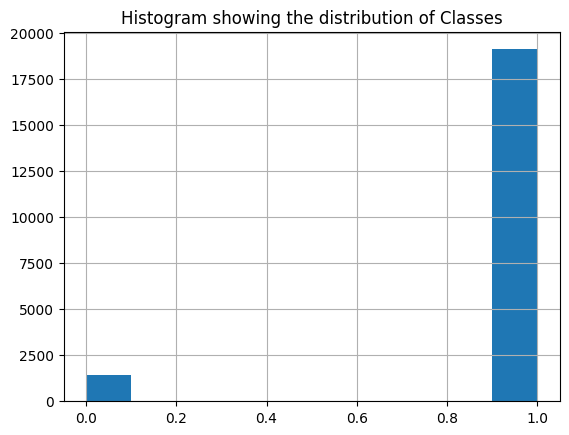

In [9]:
df["Class"].hist()
plt.title("Histogram showing the distribution of Classes")

## Normalize and Split Data 

In [10]:
#Split the data into X and Y 
y = df["Class"]
X= df.drop(columns = ["Class",])

In [11]:
#Normalize data
X_norm = X/X.max()

## KFold CV with Random Forest and Logistic Regression Model

fold: 1
Count of Target Class


1    15292
0     1143
Name: Class, dtype: int64

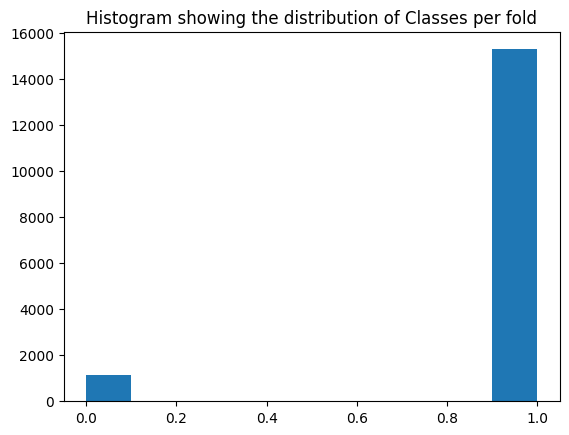

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9854771784232366
Recall: 0.9971136184728417
F1-Score: 0.9912612495108909
Accuracy: 0.9836943295205646
auprc: 0.9992213027977959

Logistic Regression Evaluation
Training Results

Precision: 0.9304533008822634
Recall: 1.0
F1-Score: 0.9639739023544615
Accuracy: 0.9304533008822634
auprc: 0.9697911877297664

Testing Results

Precision: 0.9274762715989292
Recall: 1.0
F1-Score: 0.9623737373737374
Accuracy: 0.9274762715989292
auprc: 0.9712943245946417

fold: 2
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15293
0     1142
Name: Class, dtype: int64

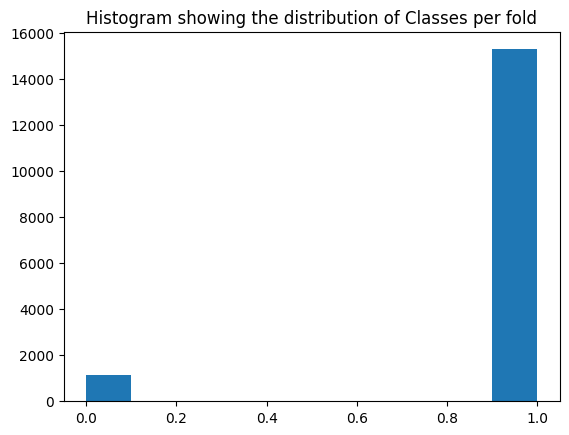

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9864194306607469
Recall: 0.9913385826771653
F1-Score: 0.9888728891216128
Accuracy: 0.9793137016305671
auprc: 0.9988102265977049

Logistic Regression Evaluation
Training Results

Precision: 0.930514146638272
Recall: 1.0
F1-Score: 0.964006555723651
Accuracy: 0.930514146638272
auprc: 0.9705255256782626

Testing Results

Precision: 0.9272329033828182
Recall: 1.0
F1-Score: 0.962242707412552
Accuracy: 0.9272329033828182
auprc: 0.9666311791747526

fold: 3
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15273
0     1162
Name: Class, dtype: int64

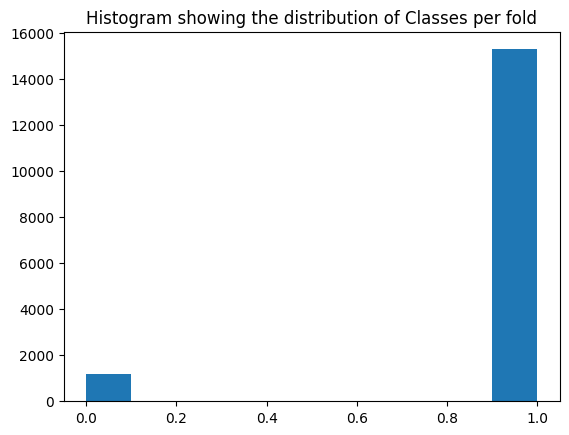

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9867635608616663
Recall: 0.9926892950391645
F1-Score: 0.989717558245477
Accuracy: 0.9807739109272329
auprc: 0.9994967605038505

Logistic Regression Evaluation
Training Results

Precision: 0.9292972315181016
Recall: 1.0
F1-Score: 0.9633530970102182
Accuracy: 0.9292972315181016
auprc: 0.9701263849683424

Testing Results

Precision: 0.9321002677050377
Recall: 1.0
F1-Score: 0.9648570348910441
Accuracy: 0.9321002677050377
auprc: 0.9685691608027942

fold: 4
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15301
0     1134
Name: Class, dtype: int64

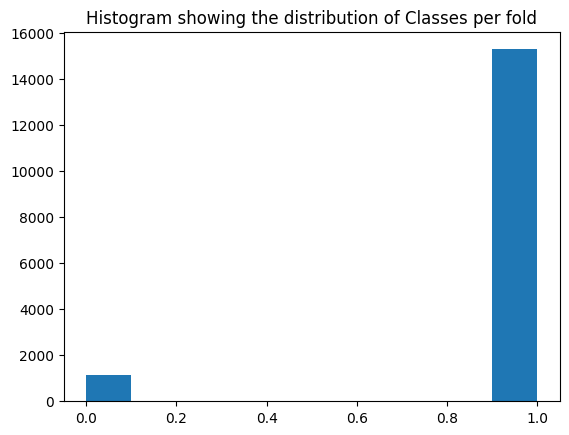

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9848840239770654
Recall: 0.9939505523408733
F1-Score: 0.9893965178688311
Accuracy: 0.9802871744950109
auprc: 0.9992371410483754

Logistic Regression Evaluation
Training Results

Precision: 0.9310009126863401
Recall: 1.0
F1-Score: 0.9642677085959163
Accuracy: 0.9310009126863401
auprc: 0.9705076590739969

Testing Results

Precision: 0.9252859576539304
Recall: 1.0
F1-Score: 0.9611932751864491
Accuracy: 0.9252859576539304
auprc: 0.9680357536879137

fold: 5
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15253
0     1183
Name: Class, dtype: int64

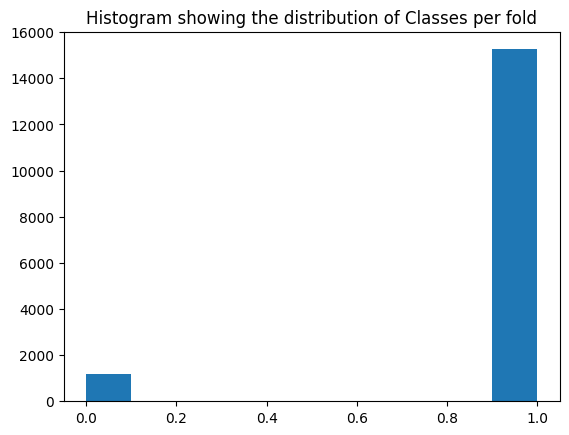

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9863402061855671
Recall: 0.994025974025974
F1-Score: 0.9901681759379043
Accuracy: 0.9814995131450828
auprc: 0.9994921862120341

Logistic Regression Evaluation
Training Results

Precision: 0.9280238500851788
Recall: 1.0
F1-Score: 0.9626684338413961
Accuracy: 0.9280238500851788
auprc: 0.9689440539912123

Testing Results

Precision: 0.9371957156767283
Recall: 1.0
F1-Score: 0.9675797939180698
Accuracy: 0.9371957156767283
auprc: 0.9735165412665452



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
kf = KFold(n_splits = 5, shuffle=True)
train_index_list_kf = []
test_index_list_kf = []

for i, (train_index, test_index) in enumerate(kf.split(X_norm, y)):
    print("="*100)
    print(f"fold: {i+1}")
    #Train Test Split
    train_index_list_kf.append(train_index)
    test_index_list_kf.append(test_index)
    X_train, X_val = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    #Plot distribution of y values
    print("Count of Target Class")
    display(y_train.value_counts())
    plt.hist(y_train)
    plt.title("Histogram showing the distribution of Classes per fold")
    plt.show()
    
    #Model Each split with Random Forest
    desc = {0:"Random Forest Evaluation", 1:"Logistic Regression Evaluation"}
    models = [RandomForestClassifier, LogisticRegression]
    for each in range(len(models)):
        RFmodel = models[each]()   
        RFmodel.fit(X_train, y_train)
        y_train_pred = RFmodel.predict(X_train)
        y_train_score = RFmodel.predict_proba(X_train)[:,1]
        y_val_pred = RFmodel.predict(X_val)
        y_val_score = RFmodel.predict_proba(X_val)[:,1]
        
        print(f"{desc[each]}")
        
        #Evaluation of each SPlit 
        print("Training Results\n")
        print(f"Precision: {precision_score(y_train, y_train_pred)}")
        print(f"Recall: {recall_score(y_train, y_train_pred)}")
        print(f"F1-Score: {f1_score(y_train, y_train_pred)}")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"auprc: {auprc(y_train, y_train_score)}\n")

        print("Testing Results\n")
        print(f"Precision: {precision_score(y_val, y_val_pred)}")
        print(f"Recall: {recall_score(y_val, y_val_pred)}")
        print(f"F1-Score: {f1_score(y_val, y_val_pred)}")
        print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
        print(f"auprc: {auprc(y_val, y_val_score)}\n")
    
    

## Stratified KFold CV with Random Forest Model

fold: 1
Count of Target Class


1    15282
0     1153
Name: Class, dtype: int64

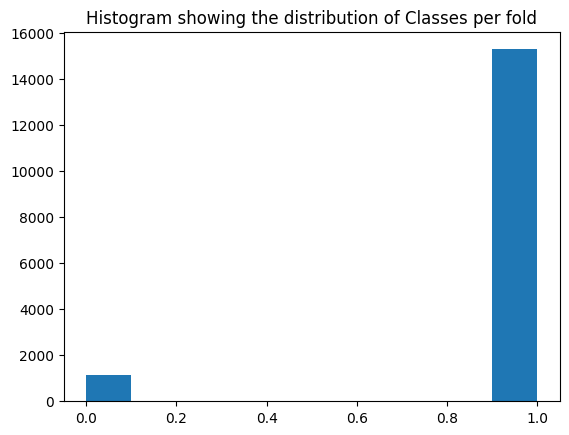

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9857217030114226
Recall: 0.9937189217482334
F1-Score: 0.9897041574351623
Accuracy: 0.9807739109272329
auprc: 0.9985882354989297

Logistic Regression Evaluation
Training Results

Precision: 0.9298448433221783
Recall: 1.0
F1-Score: 0.963647255415077
Accuracy: 0.9298448433221783
auprc: 0.9699182180940602

Testing Results

Precision: 0.9299099537600389
Recall: 1.0
F1-Score: 0.9636822194199244
Accuracy: 0.9299099537600389
auprc: 0.9689697961014623

fold: 2
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15282
0     1153
Name: Class, dtype: int64

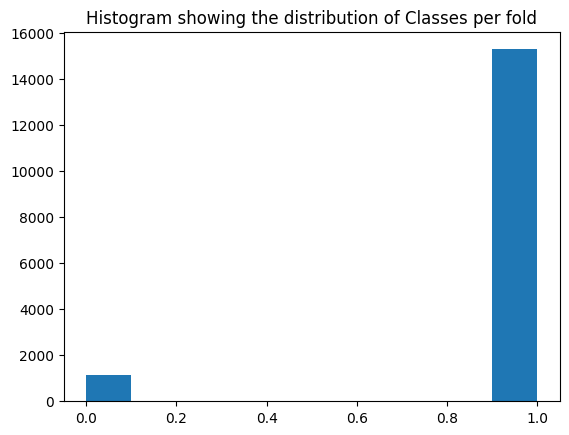

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9846872566831041
Recall: 0.9929337869667626
F1-Score: 0.9887933281209278
Accuracy: 0.979070333414456
auprc: 0.9990586386995645

Logistic Regression Evaluation
Training Results

Precision: 0.9298448433221783
Recall: 1.0
F1-Score: 0.963647255415077
Accuracy: 0.9298448433221783
auprc: 0.9703091884541779

Testing Results

Precision: 0.9299099537600389
Recall: 1.0
F1-Score: 0.9636822194199244
Accuracy: 0.9299099537600389
auprc: 0.9686347224783161

fold: 3
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15282
0     1153
Name: Class, dtype: int64

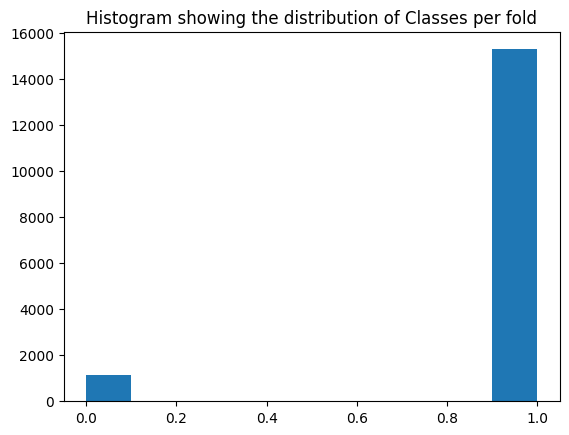

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9821797520661157
Recall: 0.9952891913111751
F1-Score: 0.9886910178083972
Accuracy: 0.9788269651983451
auprc: 0.9988156806315394

Logistic Regression Evaluation
Training Results

Precision: 0.9298448433221783
Recall: 1.0
F1-Score: 0.963647255415077
Accuracy: 0.9298448433221783
auprc: 0.9698525558987996

Testing Results

Precision: 0.9299099537600389
Recall: 1.0
F1-Score: 0.9636822194199244
Accuracy: 0.9299099537600389
auprc: 0.9697983149075431

fold: 4
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15283
0     1152
Name: Class, dtype: int64

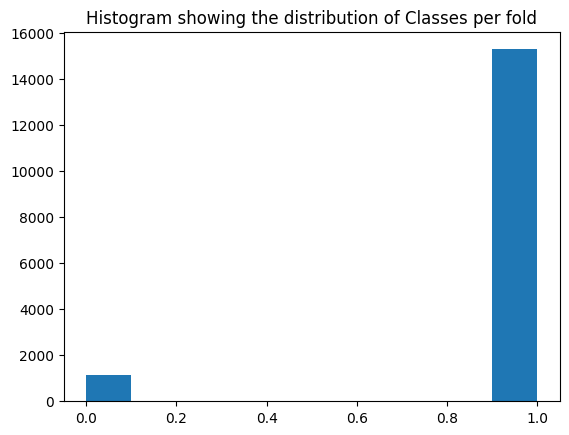

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9893229166666667
Recall: 0.9945026178010471
F1-Score: 0.9919060052219321
Accuracy: 0.9849111706011195
auprc: 0.9995719217683008

Logistic Regression Evaluation
Training Results

Precision: 0.9299056890781868
Recall: 1.0
F1-Score: 0.9636799293776406
Accuracy: 0.9299056890781868
auprc: 0.9695147501240235

Testing Results

Precision: 0.929666585543928
Recall: 1.0
F1-Score: 0.9635515197376718
Accuracy: 0.929666585543928
auprc: 0.9717838208120471

fold: 5
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15283
0     1153
Name: Class, dtype: int64

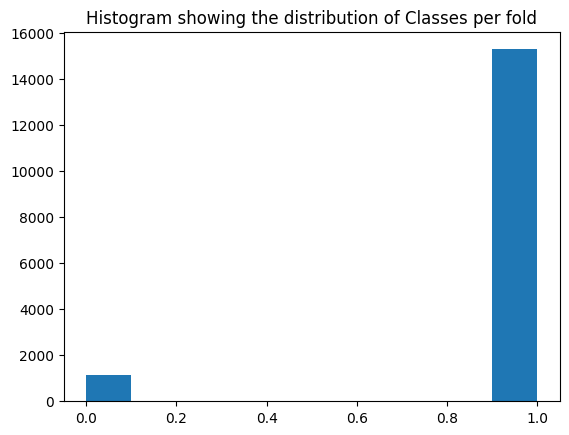

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9885714285714285
Recall: 0.9963350785340314
F1-Score: 0.9924380704041721
Accuracy: 0.9858812074001947
auprc: 0.9996766451804564

Logistic Regression Evaluation
Training Results

Precision: 0.9298491117060111
Recall: 1.0
F1-Score: 0.9636495475897727
Accuracy: 0.9298491117060111
auprc: 0.9702411419347712

Testing Results

Precision: 0.9298928919182083
Recall: 1.0
F1-Score: 0.9636730575176589
Accuracy: 0.9298928919182083
auprc: 0.9684361700324606



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
skf = StratifiedKFold(n_splits = 5, shuffle=True)
train_index_list_skf = []
test_index_list_skf = []

for i, (train_index, test_index) in enumerate(skf.split(X_norm, y)):
    print("="*100)
    print(f"fold: {i+1}")
    #Train Test Split
    train_index_list_skf.append(train_index)
    test_index_list_skf.append(test_index)
    X_train, X_val = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    #Plot distribution of y values
    print("Count of Target Class")
    display(y_train.value_counts())
    plt.hist(y_train)
    plt.title("Histogram showing the distribution of Classes per fold")
    plt.show()
    
    #Model Each split with Random Forest
    desc = {0:"Random Forest Evaluation", 1:"Logistic Regression Evaluation"}
    models = [RandomForestClassifier, LogisticRegression]
    for each in range(len(models)):
        RFmodel = models[each]()   
        RFmodel.fit(X_train, y_train)
        y_train_pred = RFmodel.predict(X_train)
        y_train_score = RFmodel.predict_proba(X_train)[:,1]
        y_val_pred = RFmodel.predict(X_val)
        y_val_score = RFmodel.predict_proba(X_val)[:,1]
        
        print(f"{desc[each]}")

        #Evaluation of each Split 
        print("Training Results\n")
        print(f"Precision: {precision_score(y_train, y_train_pred)}")
        print(f"Recall: {recall_score(y_train, y_train_pred)}")
        print(f"F1-Score: {f1_score(y_train, y_train_pred)}")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"auprc: {auprc(y_train, y_train_score)}\n")

        print("Testing Results\n")
        print(f"Precision: {precision_score(y_val, y_val_pred)}")
        print(f"Recall: {recall_score(y_val, y_val_pred)}")
        print(f"F1-Score: {f1_score(y_val, y_val_pred)}")
        print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
        print(f"auprc: {auprc(y_val, y_val_score)}\n")
    

## Repeated KFold CV with Random Forest Model

fold: 1
Count of Target Class


1    15264
0     1171
Name: Class, dtype: int64

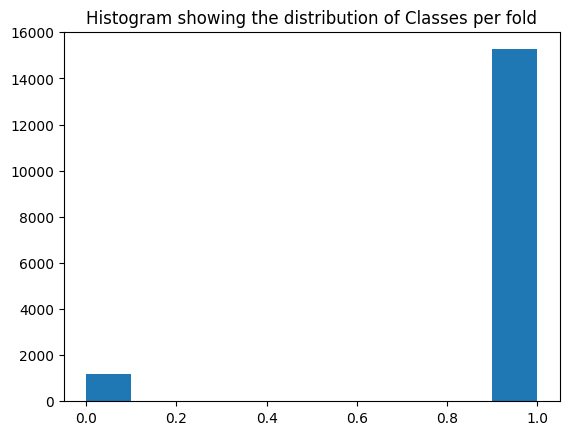

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9870533402382186
Recall: 0.9929669184683512
F1-Score: 0.9900012985326582
Accuracy: 0.9812606473594548
auprc: 0.9986150652299408

Logistic Regression Evaluation
Training Results

Precision: 0.9287496197140249
Recall: 1.0
F1-Score: 0.9630587715700811
Accuracy: 0.9287496197140249
auprc: 0.9691428721895018

Testing Results

Precision: 0.9342905816500365
Recall: 1.0
F1-Score: 0.9660291897332663
Accuracy: 0.9342905816500365
auprc: 0.9726126454666383

fold: 2
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15289
0     1146
Name: Class, dtype: int64

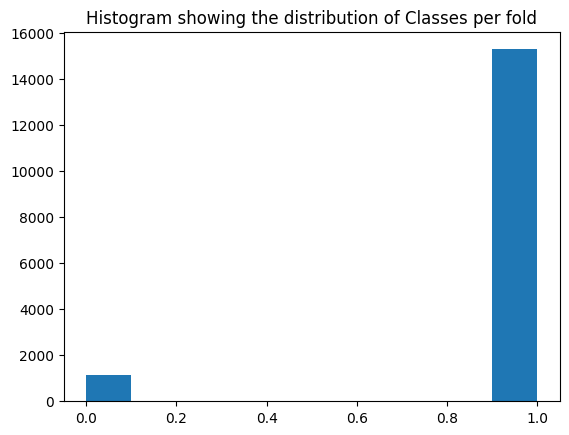

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.986482973745776
Recall: 0.9950183534347142
F1-Score: 0.9907322803811514
Accuracy: 0.9827208566561207
auprc: 0.9996354756100494

Logistic Regression Evaluation
Training Results

Precision: 0.9302707636142379
Recall: 1.0
F1-Score: 0.9638759298953474
Accuracy: 0.9302707636142379
auprc: 0.9703958332315863

Testing Results

Precision: 0.9282063762472621
Recall: 1.0
F1-Score: 0.9627666288022214
Accuracy: 0.9282063762472621
auprc: 0.9684716467765512

fold: 3
Count of Target Class


1    15291
0     1144
Name: Class, dtype: int64

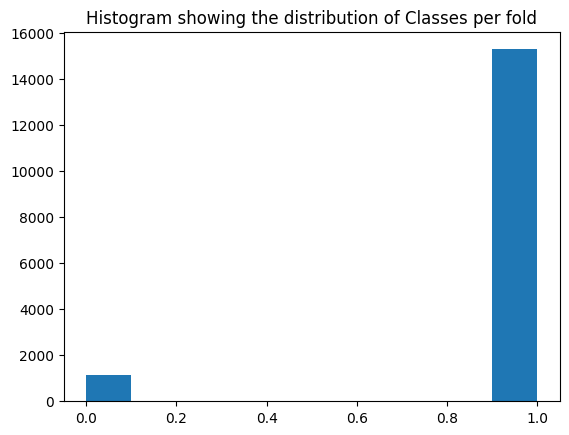

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9859594383775351
Recall: 0.9947534102833159
F1-Score: 0.9903369025855314
Accuracy: 0.9819907520077877
auprc: 0.999579132597882

Logistic Regression Evaluation
Training Results

Precision: 0.9303924551262549
Recall: 1.0
F1-Score: 0.9639412469268108
Accuracy: 0.9303924551262549
auprc: 0.9702647994118667

Testing Results

Precision: 0.9277196398150401
Recall: 1.0
F1-Score: 0.9625047342507258
Accuracy: 0.9277196398150401
auprc: 0.9678891303367012

fold: 4
Count of Target Class


1    15278
0     1157
Name: Class, dtype: int64

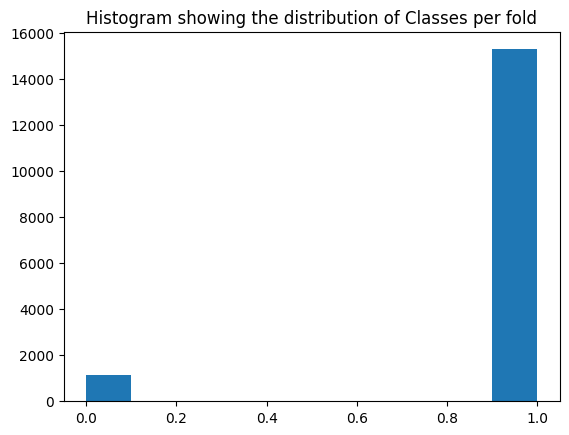

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.987026466009341
Recall: 0.9945098039215686
F1-Score: 0.9907540044276599
Accuracy: 0.9827208566561207
auprc: 0.9989444104902174

Logistic Regression Evaluation
Training Results

Precision: 0.9296014602981442
Recall: 1.0
F1-Score: 0.9635165389587866
Accuracy: 0.9296014602981442
auprc: 0.9694085851465923

Testing Results

Precision: 0.9308834266244829
Recall: 1.0
F1-Score: 0.9642046886816233
Accuracy: 0.9308834266244829
auprc: 0.972200130579769

fold: 5
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15290
0     1146
Name: Class, dtype: int64

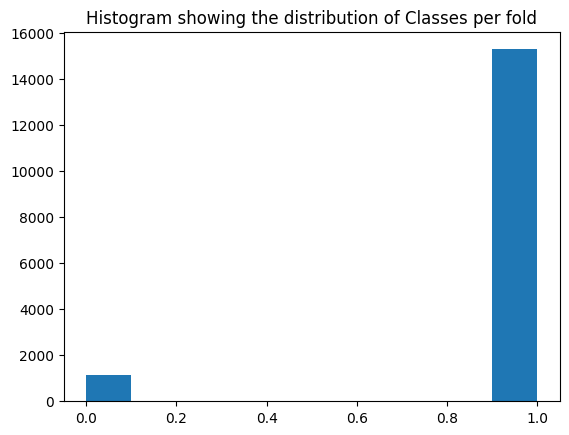

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.984903695991671
Recall: 0.992394440073433
F1-Score: 0.9886348791639451
Accuracy: 0.9788218111002921
auprc: 0.9987596031048553

Logistic Regression Evaluation
Training Results

Precision: 0.9302750060842054
Recall: 1.0
F1-Score: 0.9638782071487108
Accuracy: 0.9302750060842054
auprc: 0.9705265477851042

Testing Results

Precision: 0.9281888997078871
Recall: 1.0
F1-Score: 0.9627572276227749
Accuracy: 0.9281888997078871
auprc: 0.9673489158015213

fold: 6
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15279
0     1156
Name: Class, dtype: int64

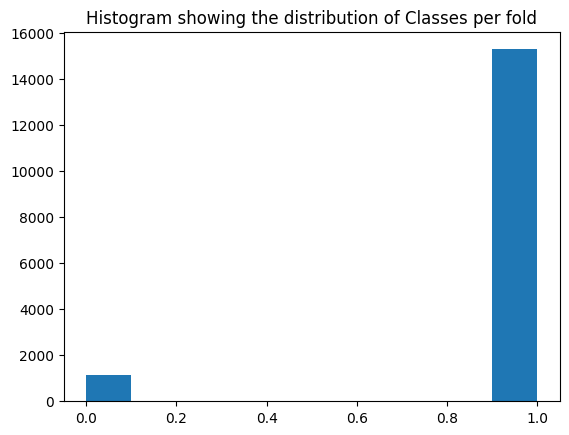

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9872495446265938
Recall: 0.9921548117154811
F1-Score: 0.9896961001695578
Accuracy: 0.9807739109272329
auprc: 0.9995501854340754

Logistic Regression Evaluation
Training Results

Precision: 0.9296623060541527
Recall: 1.0
F1-Score: 0.9635492211641546
Accuracy: 0.9296623060541527
auprc: 0.9701999803561362

Testing Results

Precision: 0.9306400584083718
Recall: 1.0
F1-Score: 0.9640741207613766
Accuracy: 0.9306400584083718
auprc: 0.9675708996316645

fold: 7
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15253
0     1182
Name: Class, dtype: int64

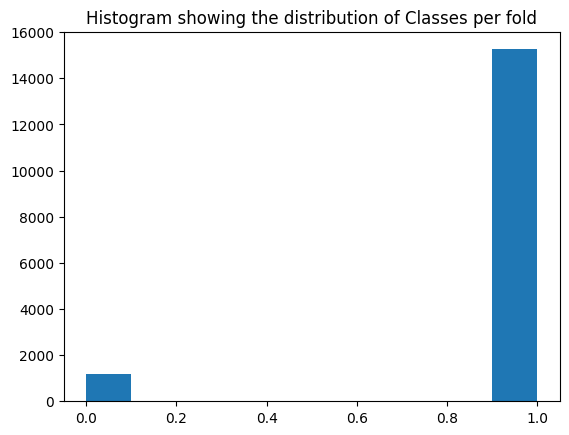

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9886246122026887
Recall: 0.9932467532467533
F1-Score: 0.9909302928219746
Accuracy: 0.9829642248722317
auprc: 0.9994092101671478

Logistic Regression Evaluation
Training Results

Precision: 0.9280803163979312
Recall: 1.0
F1-Score: 0.9626988134309518
Accuracy: 0.9280803163979312
auprc: 0.9692995437684047

Testing Results

Precision: 0.9369676320272572
Recall: 1.0
F1-Score: 0.9674582233948987
Accuracy: 0.9369676320272572
auprc: 0.9729898427197717

fold: 8
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15313
0     1122
Name: Class, dtype: int64

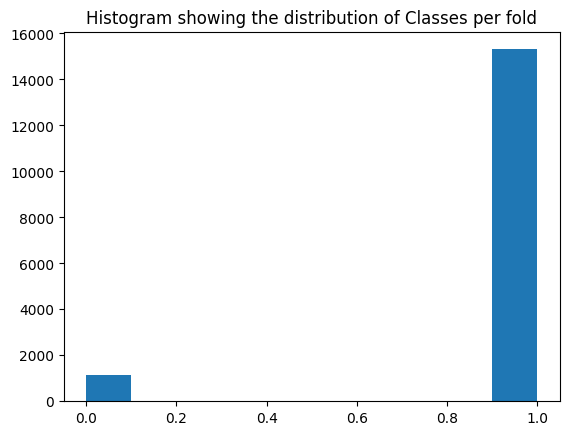

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9822870539202917
Recall: 0.9949868073878628
F1-Score: 0.9885961462839167
Accuracy: 0.9788269651983451
auprc: 0.9991051741403235

Logistic Regression Evaluation
Training Results

Precision: 0.9317310617584423
Recall: 1.0
F1-Score: 0.9646591911301499
Accuracy: 0.9317310617584423
auprc: 0.9706389045449408

Testing Results

Precision: 0.9223655390605987
Recall: 1.0
F1-Score: 0.9596151411571086
Accuracy: 0.9223655390605987
auprc: 0.9677213468564527

fold: 9
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15297
0     1138
Name: Class, dtype: int64

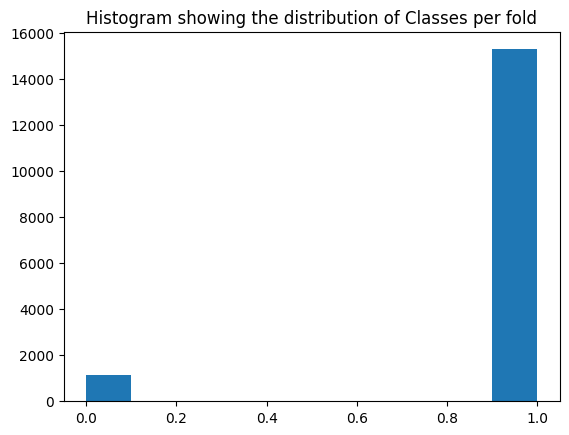

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9846434148880792
Recall: 0.9939569101418813
F1-Score: 0.9892782426778244
Accuracy: 0.9800438062789
auprc: 0.999523571462317

Logistic Regression Evaluation
Training Results

Precision: 0.9307575296623061
Recall: 1.0
F1-Score: 0.9641371486196899
Accuracy: 0.9307575296623061
auprc: 0.9702478341726082

Testing Results

Precision: 0.9262594305183743
Recall: 1.0
F1-Score: 0.9617182564750475
Accuracy: 0.9262594305183743
auprc: 0.9671964952247193

fold: 10
Count of Target Class


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1    15270
0     1166
Name: Class, dtype: int64

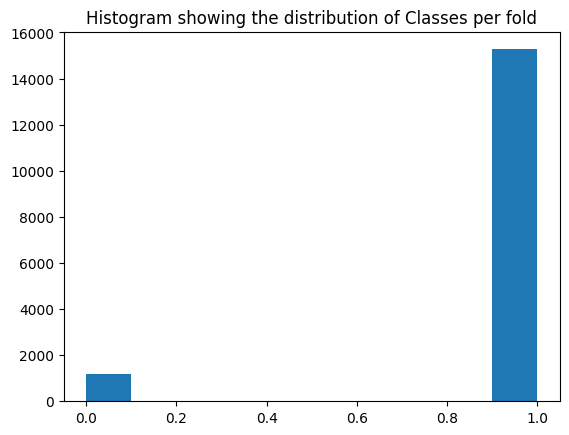

Random Forest Evaluation
Training Results

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Accuracy: 1.0
auprc: 1.0

Testing Results

Precision: 0.9893644617380026
Recall: 0.9950430472214975
F1-Score: 0.9921956295525495
Accuracy: 0.98539435248296
auprc: 0.9995013923543982

Logistic Regression Evaluation
Training Results

Precision: 0.9290581650036506
Recall: 1.0
F1-Score: 0.9632246262537059
Accuracy: 0.9290581650036506
auprc: 0.9693732167391533

Testing Results

Precision: 0.9330574488802337
Recall: 1.0
F1-Score: 0.9653696008059438
Accuracy: 0.9330574488802337
auprc: 0.9722307985736081



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
rkf = RepeatedKFold(n_repeats = 2, n_splits = 5)
train_index_list_rkf = []
test_index_list_rkf = []

for i, (train_index, test_index) in enumerate(rkf.split(X_norm, y)):
    print("="*100)
    print(f"fold: {i+1}")
    #Train Test Split
    train_index_list_rkf.append(train_index)
    test_index_list_rkf.append(test_index)
    X_train, X_val = X_norm.iloc[train_index], X_norm.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    #Plot distribution of y values
    print("Count of Target Class")
    display(y_train.value_counts())
    plt.hist(y_train)
    plt.title("Histogram showing the distribution of Classes per fold")
    plt.show()
    
    #Model Each split with Random Forest
    desc = {0:"Random Forest Evaluation", 1:"Logistic Regression Evaluation"}
    models = [RandomForestClassifier, LogisticRegression]
    for each in range(len(models)):
        RFmodel = models[each]()    
        RFmodel.fit(X_train, y_train)
        y_train_pred = RFmodel.predict(X_train)
        y_train_score = RFmodel.predict_proba(X_train)[:,1]
        y_val_pred = RFmodel.predict(X_val)
        y_val_score = RFmodel.predict_proba(X_val)[:,1]
        
        print(f"{desc[each]}")

        #Evaluation of each Split 
        print("Training Results\n")
        print(f"Precision: {precision_score(y_train, y_train_pred)}")
        print(f"Recall: {recall_score(y_train, y_train_pred)}")
        print(f"F1-Score: {f1_score(y_train, y_train_pred)}")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"auprc: {auprc(y_train, y_train_score)}\n")

        print("Testing Results\n")
        print(f"Precision: {precision_score(y_val, y_val_pred)}")
        print(f"Recall: {recall_score(y_val, y_val_pred)}")
        print(f"F1-Score: {f1_score(y_val, y_val_pred)}")
        print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
        print(f"auprc: {auprc(y_val, y_val_score)}\n")
    

## Evaluation of Best Performing Split

<Axes: >

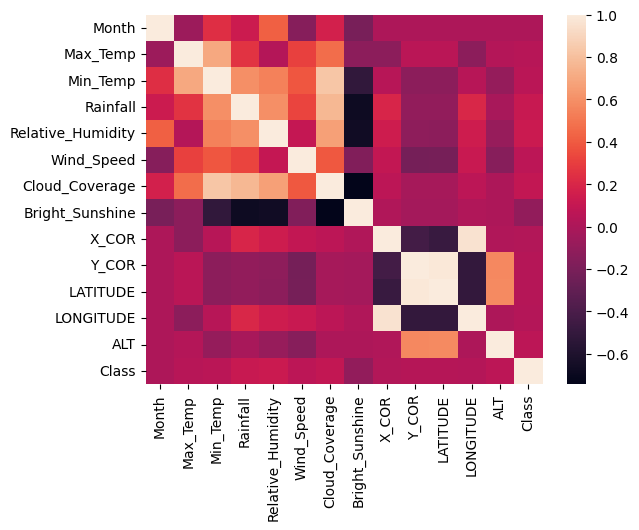

In [34]:
# Define 
sns.heatmap(df.corr())

In [23]:
train_index = train_index_list_rkf[9]
test_index = test_index_list_rkf[9]
X_train, X_val = X_norm.iloc[train_index], X_norm.iloc[test_index]
y_train, y_val = y.iloc[train_index], y.iloc[test_index]

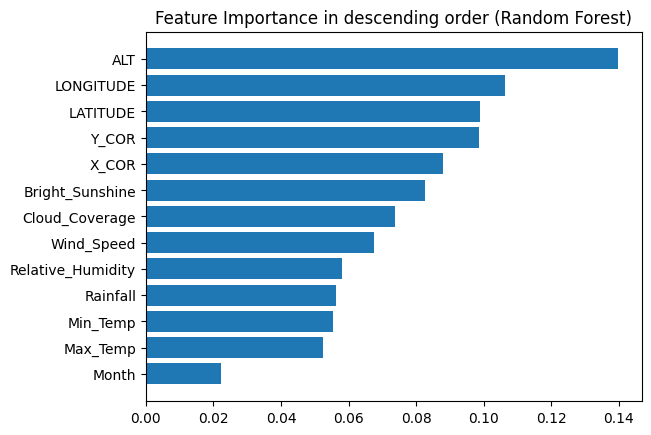

Attribute 	 Weight
Month 	 0.022179276526622615
Max_Temp 	 0.05247079383287152
Min_Temp 	 0.05531691492766098
Rainfall 	 0.056282458724873106
Relative_Humidity 	 0.058163260569786546
Wind_Speed 	 0.06763848168534652
Cloud_Coverage 	 0.07374923395421684
Bright_Sunshine 	 0.08255714259710248
X_COR 	 0.08800611741069529
Y_COR 	 0.09863677021354426
LATITUDE 	 0.0988161460288368
LONGITUDE 	 0.106329145914914
ALT 	 0.13985425761352901


In [39]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
sort_id = RFmodel.feature_importances_.argsort()
plt.barh(X_norm.columns, RFmodel.feature_importances_[sort_id])
plt.title("Feature Importance in descending order (Random Forest)")
plt.show()
print("Attribute","\t", "Weight")
for i, j in zip(X_norm.columns, RFmodel.feature_importances_[sort_id]):
    print (i, "\t", j)

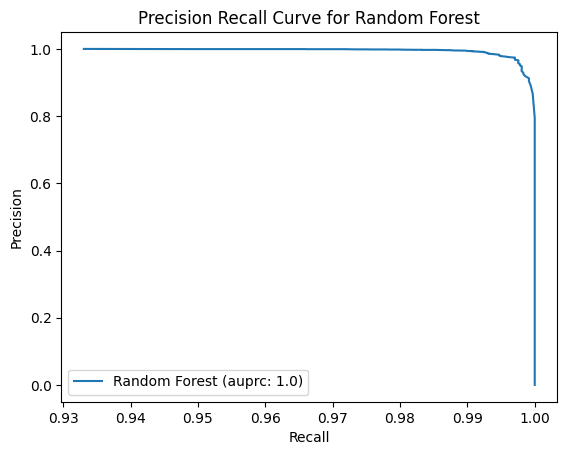

In [28]:
y_val_prob = RFmodel.predict_proba(X_val)[:,1]

rf_precision, rf_recall, threshold = precision_recall_curve(y_val, y_val_prob)
plt.plot(rf_precision, rf_recall, label=f"Random Forest (auprc: {round(auprc(y_val, y_val_prob),2)})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision Recall Curve for Random Forest")
plt.show()

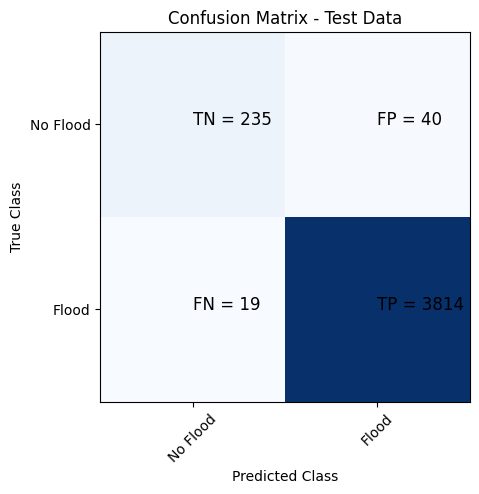

Classification Report - FLOOD AREA
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       275
           1       0.99      1.00      0.99      3833

    accuracy                           0.99      4108
   macro avg       0.96      0.92      0.94      4108
weighted avg       0.99      0.99      0.99      4108



In [33]:
y_val_pred = RFmodel.predict(X_val)
Plot_confusion_matrix(y_val, y_val_pred)

## Logistic Regression

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


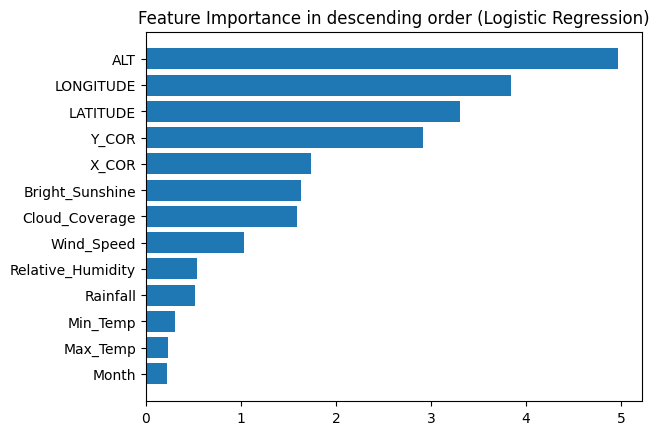

Attribute 	 Weight
Month 	 0.22638625170058582
Max_Temp 	 0.22881059628302666
Min_Temp 	 0.30849519415974214
Rainfall 	 0.5218506416480498
Relative_Humidity 	 0.5366412443727228
Wind_Speed 	 1.0308639649403557
Cloud_Coverage 	 1.5940075040111485
Bright_Sunshine 	 1.6296818354332667
X_COR 	 1.7386453735214922
Y_COR 	 2.914617503860323
LATITUDE 	 3.3065022185183914
LONGITUDE 	 3.8435801060741195
ALT 	 4.9687877883870755


In [41]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
LRimportance = np.abs(LRmodel.coef_[0])
sort_id = LRimportance.argsort()
plt.barh(X_norm.columns, LRimportance[sort_id])
plt.title("Feature Importance in descending order (Logistic Regression)")
plt.show()
print("Attribute","\t", "Weight")
for i, j in zip(X_norm.columns, LRimportance[sort_id]):
    print (i, "\t", j)

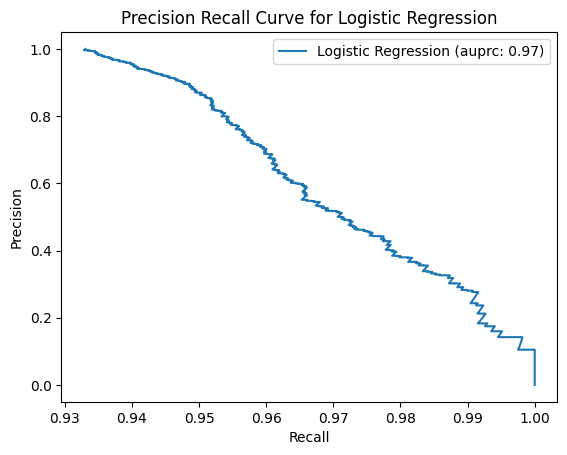

In [29]:
y_val_prob = LRmodel.predict_proba(X_val)[:,1]

lr_precision, lr_recall, threshold = precision_recall_curve(y_val, y_val_prob)
plt.plot(lr_precision, lr_recall, label=f"Logistic Regression (auprc: {round(auprc(y_val, y_val_prob),2)})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision Recall Curve for Logistic Regression")
plt.show()

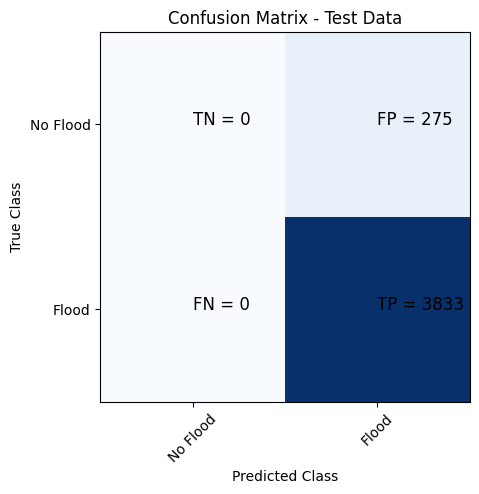

Classification Report - FLOOD AREA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       275
           1       0.93      1.00      0.97      3833

    accuracy                           0.93      4108
   macro avg       0.47      0.50      0.48      4108
weighted avg       0.87      0.93      0.90      4108



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
y_val_pred = LRmodel.predict(X_val)
Plot_confusion_matrix(y_val, y_val_pred)

## Distribution of data for the feature with the most weight in both models

Unique Values in ALT column for Class 0
[ 4  9 37  6]


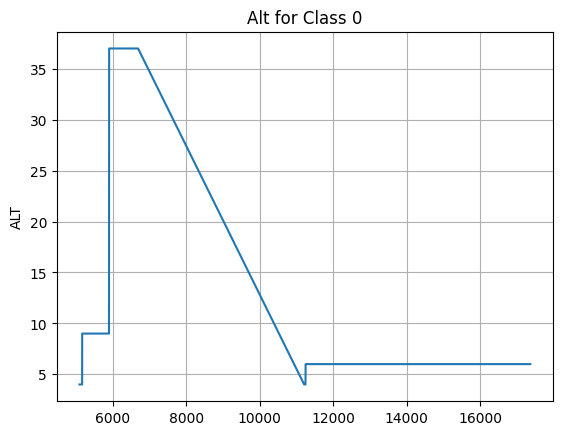

In [44]:
#Line plot of data for 
alt_0 = df[df["Class"] == 0] 
plt.plot(alt_0["ALT"])
plt.ylabel("ALT")
plt.title("Alt for Class 0")
plt.grid()
print("Unique Values in ALT column for Class 0")
print(alt_0["ALT"].unique())

Unique Values in ALT column for Class 1
[ 4  5 20  7  0  6 10  9 37  8 14  3 19 63 34 23 35]


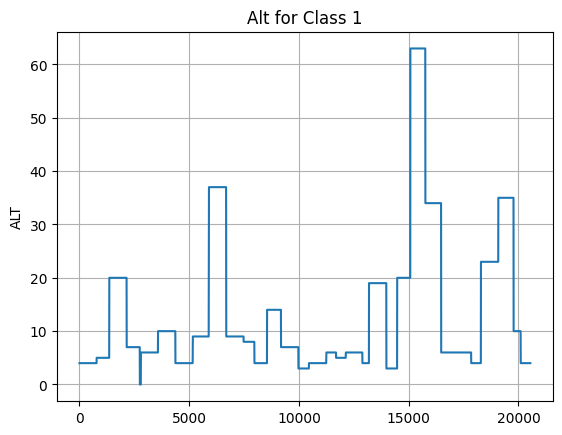

In [45]:
alt_1 = df[df["Class"] == 1] 
plt.plot(alt_1["ALT"])
plt.ylabel("ALT")
plt.title("Alt for Class 1")
plt.grid()
print("Unique Values in ALT column for Class 1")
print(alt_1["ALT"].unique())